In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.naive_bayes import CategoricalNB,GaussianNB
from sklearn.metrics import *
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA

In [3]:
df=pd.read_csv('Dataset.xls')
df

,Unnamed: 0,size,material,color,sleeves,demand
0,0,S,nylon,white,long,medium
1,1,XL,polyester,cream,short,high
2,2,S,silk,blue,short,medium
3,3,M,cotton,black,short,medium
4,4,XL,polyester,orange,long,medium
...,...,...,...,...,...,...
9995,9995,M,nylon,black,long,medium
9996,9996,L,cotton,white,long,high
9997,9997,XXL,nylon,black,long,medium
9998,9998,S,linen,white,long,high


In [4]:
df.head(5)

,Unnamed: 0,size,material,color,sleeves,demand
0,0,S,nylon,white,long,medium
1,1,XL,polyester,cream,short,high
2,2,S,silk,blue,short,medium
3,3,M,cotton,black,short,medium
4,4,XL,polyester,orange,long,medium


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   size        10000 non-null  object
 2   material    10000 non-null  object
 3   color       10000 non-null  object
 4   sleeves     10000 non-null  object
 5   demand      10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB


In [6]:
X = df[['size','material','color','sleeves']]
Y=df['demand']

In [7]:
Encoder=LabelEncoder()
Y=Encoder.fit_transform(Y)
OnehotEncoder1=OneHotEncoder(sparse_output=False)
X=OnehotEncoder1.fit_transform(X)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((7000, 24), (3000, 24))

In [9]:
model=CategoricalNB()
model.fit(X_train,y_train)

CategoricalNB()

In [10]:
y_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[ 983    0  302]
 [  40  165  181]
 [ 159   31 1139]]


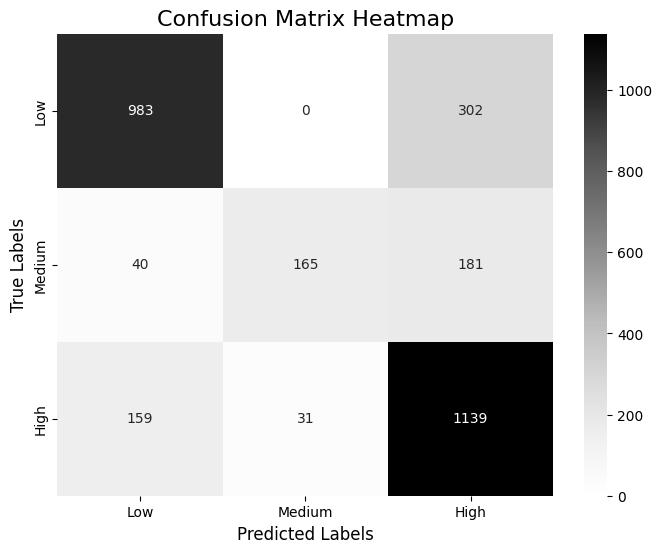

In [11]:
cm_matrix = pd.DataFrame(data=cm, columns=['Low', 'Medium', 'High'], 
                         index=['Low', 'Medium', 'High'])

plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Greys', cbar=True)
plt.title('Confusion Matrix Heatmap', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1285
           1       0.84      0.43      0.57       386
           2       0.70      0.86      0.77      1329

    accuracy                           0.76      3000
   macro avg       0.79      0.68      0.71      3000
weighted avg       0.78      0.76      0.76      3000



In [13]:
new_data = pd.DataFrame({ 'size': ['M'],'material': ['cotton'], 'color': ['white'], 'sleeves': ['short']})
new_data_encoded = OnehotEncoder1.transform(new_data)
predicted_encoded = model.predict(new_data_encoded)
predicted_label = Encoder.inverse_transform(predicted_encoded)
print("Predicted Demand:", predicted_label)

Predicted Demand: ['high']


C:\Users\athit\AppData\Local\Temp\ipykernel_4804\1826103110.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  disp.ax_.scatter(


<Figure size 1000x800 with 0 Axes>

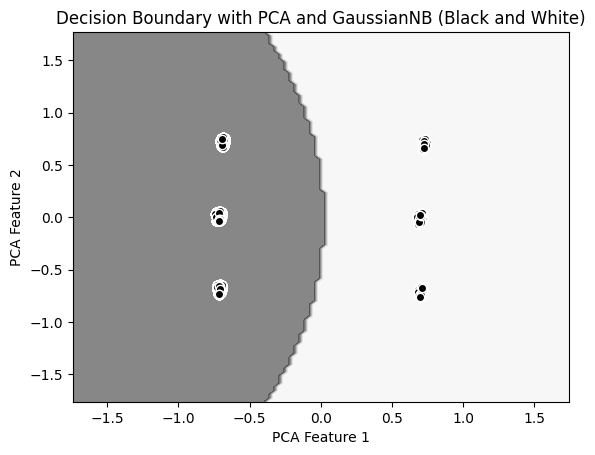

In [14]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)
model = GaussianNB()
model.fit(x_train_pca, y_train)
plt.figure(figsize=(10, 8))
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    x_train_pca,
    response_method="predict",
    xlabel="PCA Feature 1",
    ylabel="PCA Feature 2",
    alpha=0.5,
    cmap='gray'  
)
disp.ax_.scatter(
    x_train_pca[:, 0],
    x_train_pca[:, 1],
    c='black', 
    edgecolor='white',  
    cmap='gray'
)
plt.title("Decision Boundary with PCA and GaussianNB (Black and White)")
plt.show()

In [18]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.
